# **MongoDB Operations using Python**

## **Project Overview:**
  This repository contains a Jupyter Notebook with origianl carbon nanotubes dataset and other python modules, designed to perform MongoDB operations for the given dataset. A cloud version of the MongoDB (Atlas) is being used in this project as a storage repository. 
  
### **Functionalities:**
 - [x] **<ins>Database and Collection:</ins>** New database and collection has been created during the project initiation (using OOP Python script).
 - [x] **<ins>Bulk Load:</ins>** The Carbon Nanotubes csv file has been loaded into Mongo DB Atlas
 - [x] **<ins>Insert Documents:</ins>** Performed insert_many() and insert_one() operation on the MongoDB collections
 - [x] **<ins>Update Documents:</ins>** Updates the documents in the MongoDB Collection (update_many() and update_one()).
 - [x] **<ins>Delete Documents:</ins>** Deleted the documents in the MongoDB Collection (delete_many() and delete_one()).
 - [x] **<ins>Find and Filter:</ins>** Performed various Find and Filter operations on the MongoDB Collection.
 - [x] **<ins>Drop Collection:</ins>** Drop the collection once the above functionalities are done.

# **Highlights:**
 - Application was designed using the OOP concept
 - Multiple classes were created for this use case
 - Class created for Mongo DB operations follows Hybrid Inheritance and standalone class was created for CSV data read and dictionary conversion
 - Followed the Modular programming concept
 - Try and catch is being followed to capture the exceptions
 - Logging mechanism is being used to capture the application navigation and control. It will capture the info, Error and Exception details.

# **Application Architecture:**
![image](https://user-images.githubusercontent.com/90926526/155011416-990a895a-420e-4067-9b2d-1f86ef9bfe77.png)

### **Carbon Nanotubes Data:**
CASTEP can simulate a wide range of properties of materials proprieties using density functional theory (DFT). DFT is the most successful method calculates atomic coordinates faster than other mathematical approaches, and it also reaches more accurate results. The dataset is generated with CASTEP using CNT geometry optimization. Many CNTs are simulated in CASTEP, then geometry optimizations are calculated. Initial coordinates of all carbon atoms are generated randomly. Different chiral vectors are used for each CNT simulation. The atom type is selected as carbon, bond length is used as 1.42 A° (default value). CNT calculation parameters are used as default parameters. To finalize the computation, CASTEP uses a parameter named as elecenergytol (electrical energy tolerance) (default 1x10-5 eV) which represents that the change in the total energy from one iteration to the next remains below some tolerance value per atom for a few self-consistent field steps. Initial atomic coordinates (u, v, w), chiral vector (n, m) and calculated atomic coordinates (u’, v’, w’) are obtained from the output files.
The summary of the attributes is given below. Please read the papers (https://doi.org/10.1007/s00339-016-0153-1 and https://doi.org/10.17341/gazimmfd.337642) for detailed descriptions of the attributes

#### **Summary of columns:**
 - <ins>Chiral indice n:</ins> n parameter of the selected chiral vector.
 - <ins>Chiral indice m:</ins> m parameter of the selected chiral vector.
 - <ins>Initial atomic coordinate u:</ins> Randomly generated u parameter of the initial atomic coordinates of all carbon atoms.
 - <ins>Initial atomic coordinate v:</ins> Randomly generated v parameter of the initial atomic coordinates of all carbon atoms.
 - <ins>Initial atomic coordinate w:</ins> Randomly generated w parameter of the initial atomic coordinates of all carbon atoms.
 - <ins>Calculated atomic coordinate u’:</ins> Calculated u’ parameter of the atomic coordinates of all carbon atoms.
 - <ins>Calculated atomic coordinate v’:</ins> Calculated v’ parameter of the atomic coordinates of all carbon atoms.
 - <ins>Calculated atomic coordinate w’:</ins> Calculated w’ parameter of the atomic coordinates of all carbon atoms.

## 1. Import Libraries

In [1]:
from MongoDataLoad.MongoDB_config import CLIENT_URL, DB_NAME, COLL_NAME, FILE_PATH
from MongoDataLoad.PyMongoDB import PyMongoDatabase, PyMongoDbOperations, PyMongoDbFindFilter, PyMongoDbDropColl
from MongoDataLoad.LoadFileData import PyMongoBulkLoad

import logging
logging.basicConfig(filename="App.log", level=logging.DEBUG, format='%(asctime)s %(levelname)s %(message)s')

## 2. Create Objects

In [2]:
logging.info("-------#####   Application Started   #####--------")

In [3]:
# Creating objects for the classes
    # carbon_coll --> All DB Operations
    # carbon --> To drop the Collection
    
carbon_coll = PyMongoDbOperations(CLIENT_URL, DB_NAME, COLL_NAME)
carbon = PyMongoDbDropColl(CLIENT_URL, DB_NAME, COLL_NAME)

### 2.1 DB Connectivity check

In [4]:
# Check the DB Connectivity. Any issues will be reported in logging file
carbon_coll.connectivity_check()

## 3. DB Operations

### 3.1 Load the CSV file to Pandas Dataframe

In [5]:
# Create new object for the standalone class PyMongoBulkLoad to read CSV file
file_data = PyMongoBulkLoad(FILE_PATH)

# Read and convert the csv data to dictionary format
data = file_data.load_pandas_df()

### 3.2 Insert or Load CSV file to Mongo DB

In [6]:
# Inser the dictionary data into MongoDB
carbon_coll.insert_many(data)

In [7]:
# Pass empty query to get the count of all records
query={}
count = carbon_coll.get_doc_count(query)

In [8]:
print(f"Total documents in the collection : {count}")

Total documents in the collection : 10721


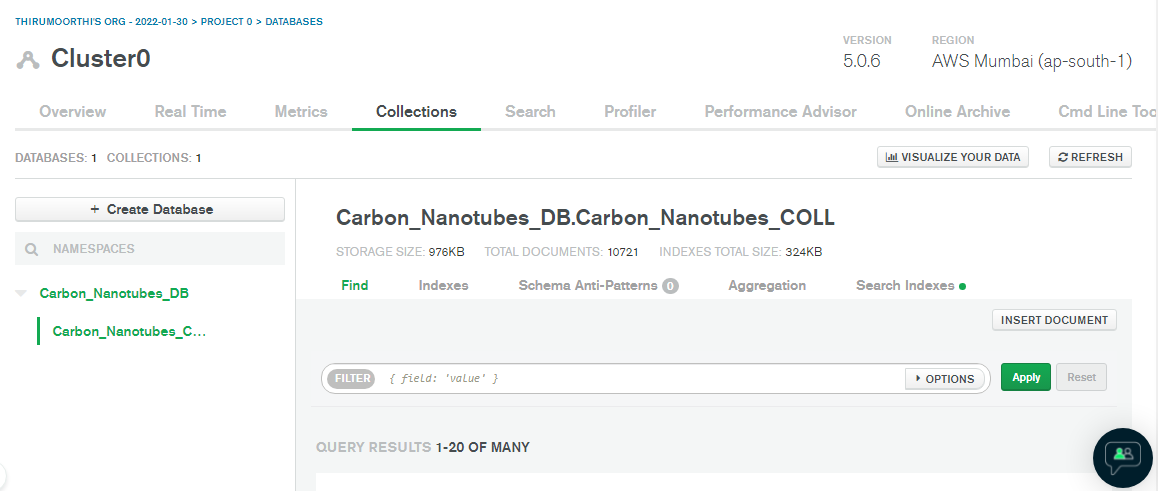 


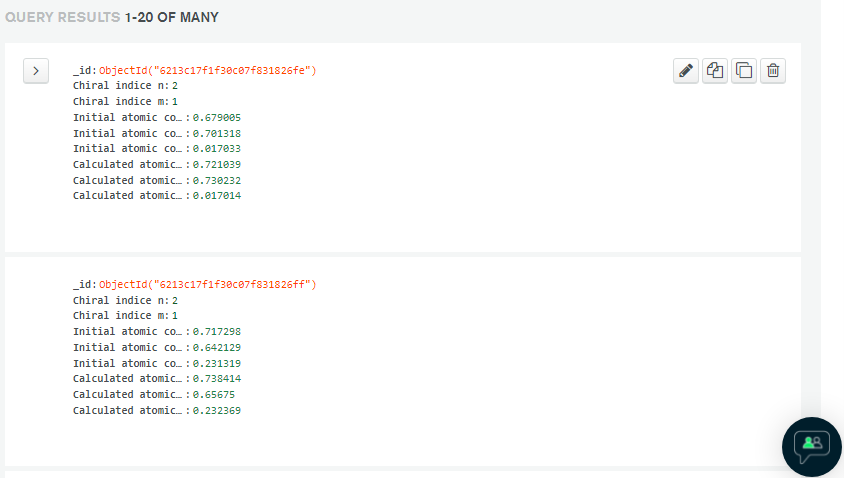

### 3.3 Insert single documents to Collection

In [9]:
# Three dictionaries are used in the insert_one method

data1 = {
    'Chiral indice n': 1,
    'Chiral indice m': 1,
    'Initial atomic coordinate u': 0.666666,
    'Initial atomic coordinate v': 0.777777,
    'Initial atomic coordinate w': 0.010101,
    "Calculated atomic coordinates u'": 0.727272,
    "Calculated atomic coordinates v'": 0.733333,
    "Calculated atomic coordinates w'": 0.010203
        }

data2 = {
    'Chiral indice n': 1,
    'Chiral indice m': 2,
    'Initial atomic coordinate u': 0.333333,
    'Initial atomic coordinate v': 0.111111,
    'Initial atomic coordinate w': 0.020201,
    "Calculated atomic coordinates u'": 0.525252,
    "Calculated atomic coordinates v'": 0.711111,
    "Calculated atomic coordinates w'": 0.012345
        }

data3 = {
    'Chiral indice n': 13,
    'Chiral indice m': 1,
    'Initial atomic coordinate u': 0.123456,
    'Initial atomic coordinate v': 0.111111,
    'Initial atomic coordinate w': 0.030303,
    "Calculated atomic coordinates u'": 0.626262,
    "Calculated atomic coordinates v'": 0.737373,
    "Calculated atomic coordinates w'": 0.010203
        }

In [10]:
# Load the dictionary 1
carbon_coll.insert_one_doc(data1)

In [11]:
# Load the dictionary 2
carbon_coll.insert_one_doc(data2)

In [12]:
# Load the dictionary 3
carbon_coll.insert_one_doc(data3)

In [13]:
# Check whether the loaded document is available in the DB
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 1)

_id  Chiral indice n  Chiral indice m  \
0  6213e44d93f68682ff289fb8                1                1   
1  6213e44e93f68682ff289fb9                1                2   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.666666                     0.777777   
1                     0.333333                     0.111111   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.010101                          0.727272   
1                     0.020201                          0.525252   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.733333                          0.010203  
1                          0.711111                          0.012345

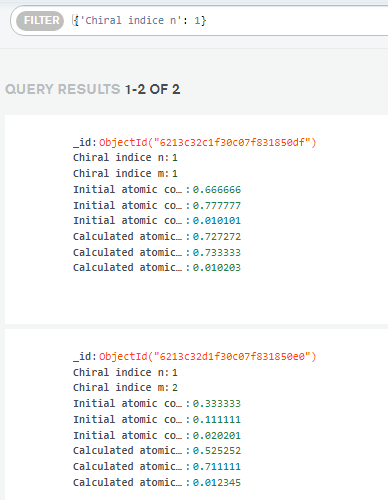

In [14]:
# Check whether the loaded document is available in the DB
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 13)

_id  Chiral indice n  Chiral indice m  \
0  6213e44f93f68682ff289fba               13                1   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.123456                     0.111111   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.030303                          0.626262   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.737373                          0.010203

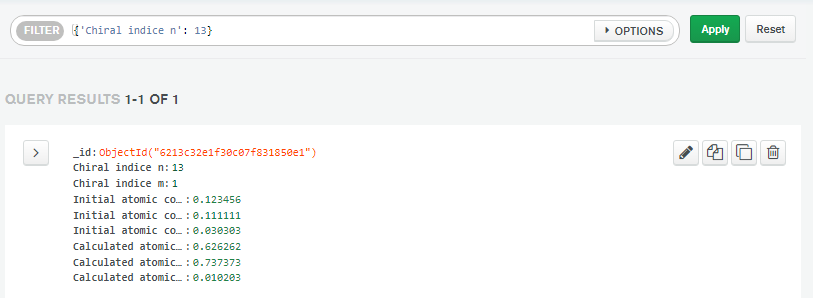

### 3.4 Update many documents in Collection

In [15]:
# Retrieve all the documents which are having "Chiral indice n" as "1" and update it with "16"
query = {"Chiral indice n": { "$eq" : 1}}
column = "Chiral indice n"
new_val = 16

carbon_coll.update_many(query, column, new_val)

In [16]:
# Check whether the document is updated
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 16)

_id  Chiral indice n  Chiral indice m  \
0  6213e44d93f68682ff289fb8               16                1   
1  6213e44e93f68682ff289fb9               16                2   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.666666                     0.777777   
1                     0.333333                     0.111111   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.010101                          0.727272   
1                     0.020201                          0.525252   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.733333                          0.010203  
1                          0.711111                          0.012345

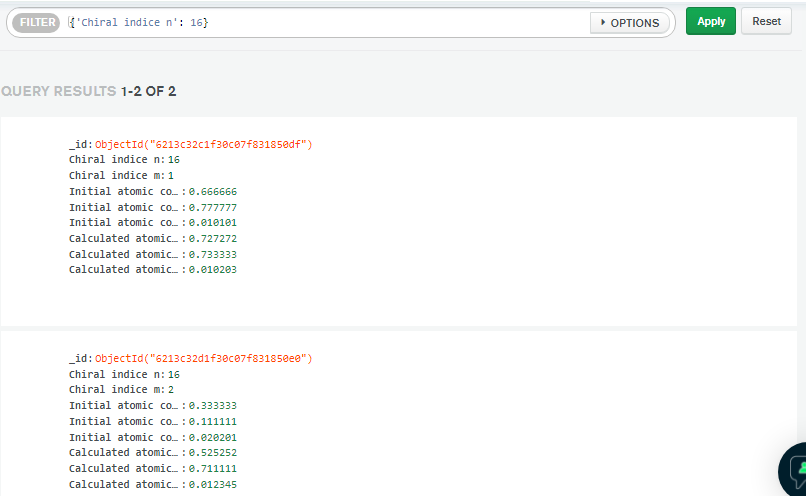

### 3.5 Update single document in Collection

In [17]:
# Retrieve all the documents which are having "Chiral indice n" as "13" and update it with "17"
query = {"Chiral indice n": { "$eq" : 13}}
column = "Chiral indice n"
new_val = 17

carbon_coll.update_one(query, column, new_val)

In [18]:
# Check whether the document is updated
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 17)

_id  Chiral indice n  Chiral indice m  \
0  6213e44f93f68682ff289fba               17                1   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.123456                     0.111111   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.030303                          0.626262   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.737373                          0.010203

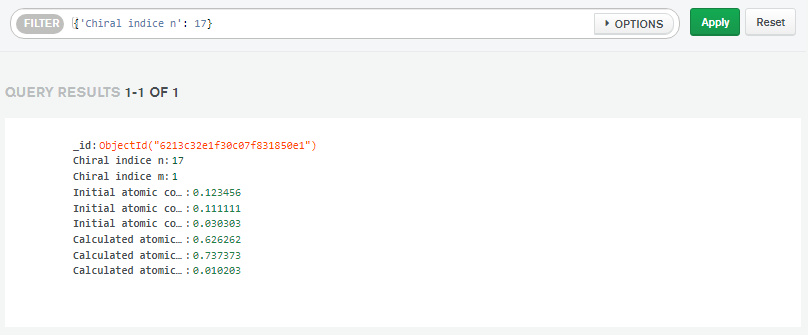

### 3.6 Find One and Update in Collection

In [19]:
# Retrieve all the documents which are having "Chiral indice n" as "17" and update it with "18"
query = {"Chiral indice n": { "$eq" : 17}}
column = "Chiral indice n"
new_val = 18

carbon_coll.find_one_and_update(query, column, new_val)

In [20]:
# Check whether the document is updated
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 18)

_id  Chiral indice n  Chiral indice m  \
0  6213e44f93f68682ff289fba               18                1   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.123456                     0.111111   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.030303                          0.626262   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.737373                          0.010203

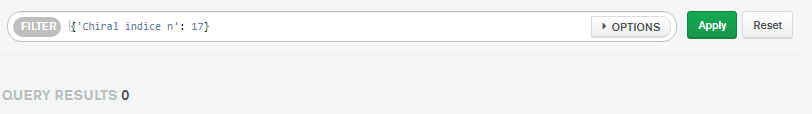


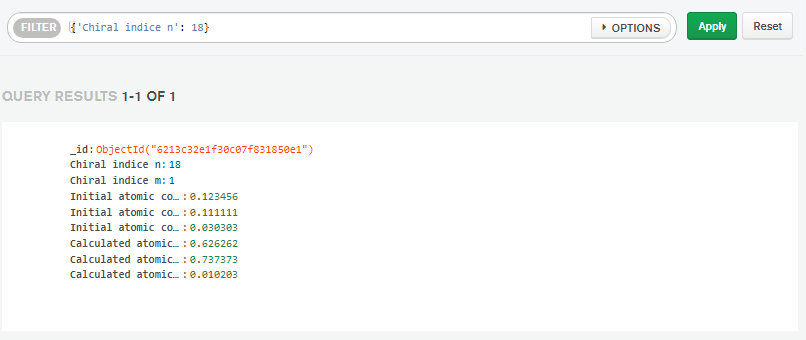

### 3.7 Delete many documents from DB Collection

In [21]:
# Delete all the documents which are having "Chiral indice n" as "16"

query = {"Chiral indice n": { "$eq" : 16}}
carbon_coll.delete_many(query)

In [22]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 16)

Empty DataFrame
Columns: []
Index: []

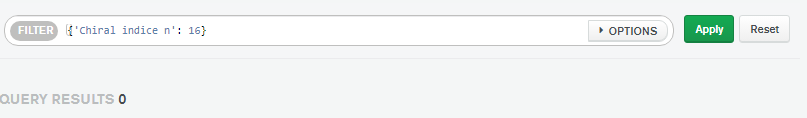

### 3.8 Delete Single document from DB Collection

In [23]:
# Delete the document which is having "Chiral indice n" as "18"

query = {"Chiral indice n": { "$eq" : 18}}
carbon_coll.delete_one(query)

In [24]:
# Check the existence
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 18)

Empty DataFrame
Columns: []
Index: []

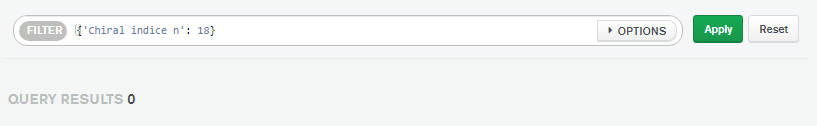

## 4. Find and Filter Operations

### 4.1 Find all the documents

In [25]:
# Retrieve all the documents available in the collection
carbon_coll.find_all()

_id  Chiral indice n  Chiral indice m  \
0      6213e41193f68682ff2875d7                2                1   
1      6213e41193f68682ff2875d8                2                1   
2      6213e41193f68682ff2875d9                2                1   
3      6213e41193f68682ff2875da                2                1   
4      6213e41193f68682ff2875db                2                1   
...                         ...              ...              ...   
10716  6213e41293f68682ff289fb3               12                6   
10717  6213e41293f68682ff289fb4               12                6   
10718  6213e41293f68682ff289fb5               12                6   
10719  6213e41293f68682ff289fb6               12                6   
10720  6213e41293f68682ff289fb7               12                6   

       Initial atomic coordinate u  Initial atomic coordinate v  \
0                         0.679005                     0.701318   
1                         0.717298                     0.642129   
2                         0.489336                     0.303751   
3                         0.413957                     0.632996   
4                         0.334292                     0.543401   
...                            ...                          ...   
10716                     0.834201                     0.399891   
10717                     0.698374                     0.244710   
10718                     0.923823                     0.568913   
10719                     0.934978                     0.602319   
10720                     0.953664                     0.698374   

       Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                         0.017033                          0.721039   
1                         0.231319                          0.738414   
2                         0.088462                          0.477676   
3                         0.040843                          0.408823   
4                         0.159890                          0.303349   
...                            ...                               ...   
10716                     0.891270                          0.841858   
10717                     0.962699                          0.706555   
10718                     0.819842                          0.929403   
10719                     0.938889                          0.941844   
10720                     0.962699                          0.961243   

       Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                              0.730232                          0.017014  
1                              0.656750                          0.232369  
2                              0.263221                          0.088712  
3                              0.657897                          0.039796  
4                              0.558807                          0.157373  
...                                 ...                               ...  
10716                          0.405882                          0.891356  
10717                          0.248416                          0.962833  
10718                          0.576284                          0.819879  
10719                          0.610608                          0.938755  
10720                          0.707812                          0.962605  

[10721 rows x 9 columns]

### 4.2 Get the count of documents in Collection

In [26]:
# Pass empty query to get the count of all records
query={}
count = carbon_coll.get_doc_count(query)

print(f"Total documents in the collection : {count}")

Total documents in the collection : 10721


### 4.3 Get the first n documents from Collection

In [27]:
# Pass the limit as 2 to get the first 2 documents
carbon_coll.get_doc_limit(2)

_id  Chiral indice n  Chiral indice m  \
0  6213e41193f68682ff2875d7                2                1   
1  6213e41193f68682ff2875d8                2                1   

   Initial atomic coordinate u  Initial atomic coordinate v  \
0                     0.679005                     0.701318   
1                     0.717298                     0.642129   

   Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                     0.017033                          0.721039   
1                     0.231319                          0.738414   

   Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                          0.730232                          0.017014  
1                          0.656750                          0.232369

### 4.4 Filter the collection with logical AND operation

In [28]:
# Filter all the documents which are having "Chiral indice n" as 2 AND "Chiral indice m" as 1
query1 = {"Chiral indice n": { "$eq" : 2}}
query2 = {"Chiral indice m": { "$eq" : 1}}

carbon_coll.filter_with_and(query1, query2)

_id  Chiral indice n  Chiral indice m  \
0   6213e41193f68682ff2875d7                2                1   
1   6213e41193f68682ff2875d8                2                1   
2   6213e41193f68682ff2875d9                2                1   
3   6213e41193f68682ff2875da                2                1   
4   6213e41193f68682ff2875db                2                1   
5   6213e41193f68682ff2875dc                2                1   
6   6213e41193f68682ff2875dd                2                1   
7   6213e41193f68682ff2875de                2                1   
8   6213e41193f68682ff2875df                2                1   
9   6213e41193f68682ff2875e0                2                1   
10  6213e41193f68682ff2875e1                2                1   
11  6213e41193f68682ff2875e2                2                1   
12  6213e41193f68682ff2875e3                2                1   
13  6213e41193f68682ff2875e4                2                1   
14  6213e41193f68682ff2875e5                2                1   
15  6213e41193f68682ff2875e6                2                1   
16  6213e41193f68682ff2875e7                2                1   
17  6213e41193f68682ff2875e8                2                1   
18  6213e41193f68682ff2875e9                2                1   
19  6213e41193f68682ff2875ea                2                1   
20  6213e41193f68682ff2875eb                2                1   
21  6213e41193f68682ff2875ec                2                1   
22  6213e41193f68682ff2875ed                2                1   
23  6213e41193f68682ff2875ee                2                1   
24  6213e41193f68682ff2875ef                2                1   
25  6213e41193f68682ff2875f0                2                1   
26  6213e41193f68682ff2875f1                2                1   
27  6213e41193f68682ff2875f2                2                1   

    Initial atomic coordinate u  Initial atomic coordinate v  \
0                      0.679005                     0.701318   
1                      0.717298                     0.642129   
2                      0.489336                     0.303751   
3                      0.413957                     0.632996   
4                      0.334292                     0.543401   
5                      0.510664                     0.696249   
6                      0.413957                     0.632996   
7                      0.712552                     0.554790   
8                      0.320995                     0.298682   
9                      0.394742                     0.279367   
10                     0.282702                     0.357871   
11                     0.320995                     0.298682   
12                     0.605258                     0.720633   
13                     0.510664                     0.696249   
14                     0.679005                     0.701318   
15                     0.605258                     0.720633   
16                     0.665708                     0.456599   
17                     0.712552                     0.554790   
18                     0.586043                     0.367004   
19                     0.665708                     0.456599   
20                     0.287448                     0.445210   
21                     0.282702                     0.357871   
22                     0.334292                     0.543401   
23                     0.287448                     0.445210   
24                     0.717298                     0.642129   
25                     0.489336                     0.303751   
26                     0.586043                     0.367004   
27                     0.394742                     0.279367   

    Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                      0.017033                          0.721039   
1                      0.231319                          0.738414   
2                      0.088462               

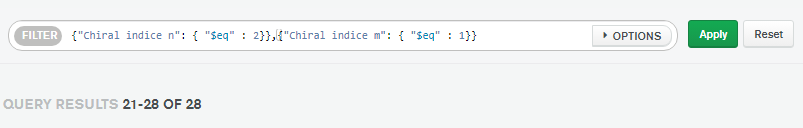

### 4.5 Filter the collection with logical OR operation

In [29]:
# Filter all the documents which are having "Chiral indice n" as 2 OR "Chiral indice m" as 1
query1 = {"Chiral indice n": { "$eq" : 2}}
query2 = {"Chiral indice m": { "$eq" : 1}}

carbon_coll.filter_with_or(query1, query2)

_id  Chiral indice n  Chiral indice m  \
0     6213e41193f68682ff2875d7                2                1   
1     6213e41193f68682ff2875d8                2                1   
2     6213e41193f68682ff2875d9                2                1   
3     6213e41193f68682ff2875da                2                1   
4     6213e41193f68682ff2875db                2                1   
...                        ...              ...              ...   
1782  6213e41293f68682ff289557               10                1   
1783  6213e41293f68682ff289558               10                1   
1784  6213e41293f68682ff289559               10                1   
1785  6213e41293f68682ff28955a               10                1   
1786  6213e41293f68682ff28955b               10                1   

      Initial atomic coordinate u  Initial atomic coordinate v  \
0                        0.679005                     0.701318   
1                        0.717298                     0.642129   
2                        0.489336                     0.303751   
3                        0.413957                     0.632996   
4                        0.334292                     0.543401   
...                           ...                          ...   
1782                     0.430885                     0.114842   
1783                     0.442369                     0.119030   
1784                     0.849876                     0.488675   
1785                     0.855822                     0.500297   
1786                     0.901541                     0.626089   

      Initial atomic coordinate w  Calculated atomic coordinates u'  \
0                        0.017033                          0.721039   
1                        0.231319                          0.738414   
2                        0.088462                          0.477676   
3                        0.040843                          0.408823   
4                        0.159890                          0.303349   
...                           ...                               ...   
1782                     0.960765                          0.427237   
1783                     0.992296                          0.438203   
1784                     0.951756                          0.853058   
1785                     0.983287                          0.858856   
1786                     0.996801                          0.909148   

      Calculated atomic coordinates v'  Calculated atomic coordinates w'  
0                             0.730232                          0.017014  
1                             0.656750                          0.232369  
2                             0.263221                          0.088712  
3                             0.657897                          0.039796  
4                             0.558807                          0.157373  
...                                ...                               ...  
1782                          0.106885                          0.961021  
1783                          0.111751                          0.992531  
1784                          0.489306                          0.951546  
1785                          0.501019                          0.983032  
1786                          0.629195                          0.996492  

[1787 rows x 9 columns]

## 5. Drop the collection from DB

In [30]:
# Drop the collection
carbon.drop_collection()

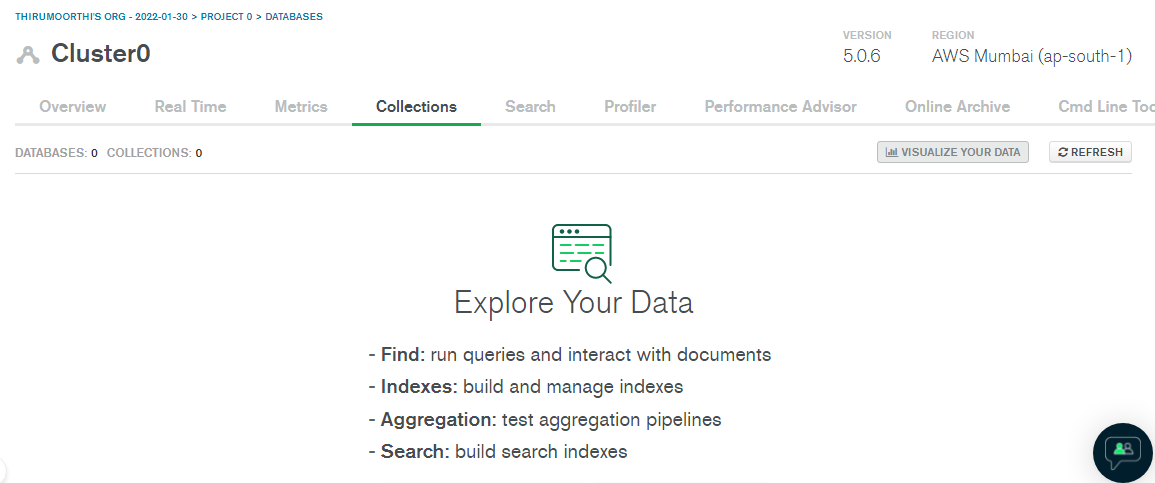

In [31]:
logging.info("-------#####   Application END   #####--------")